Пропущені значення в кожному стовпці:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Описова статистика:
       Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448              1.220070             1.203421   
std         5.990594    11.5

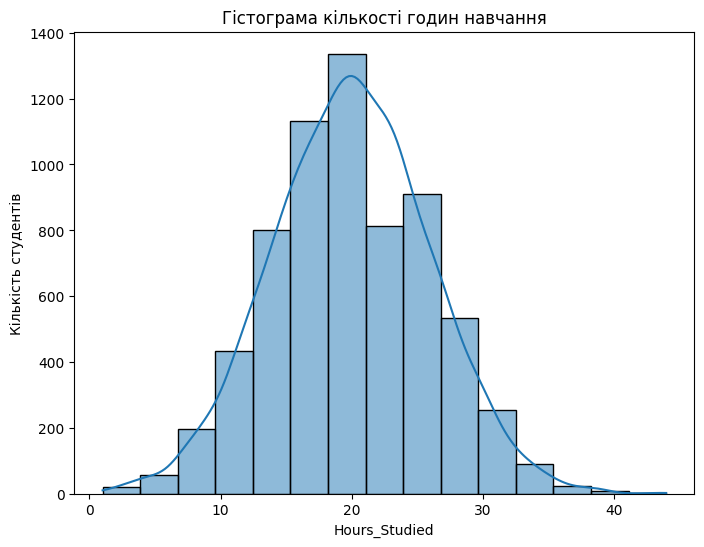

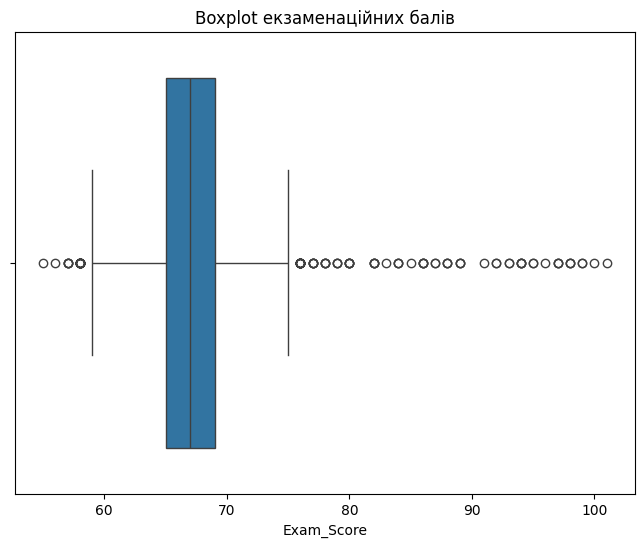

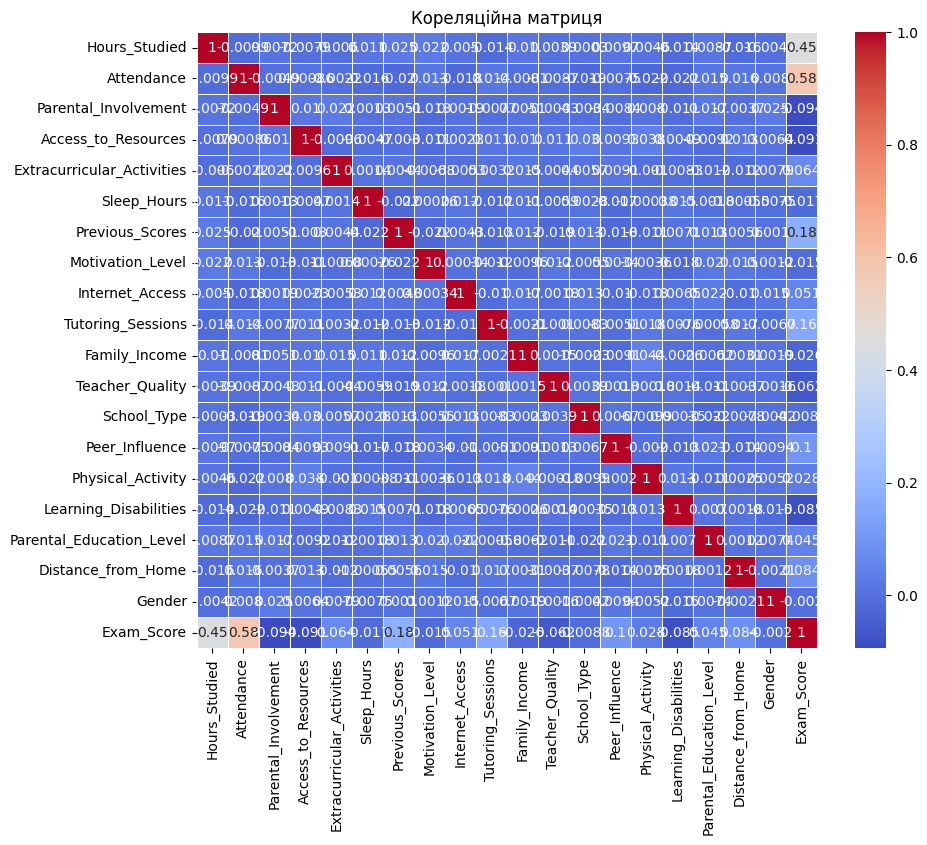

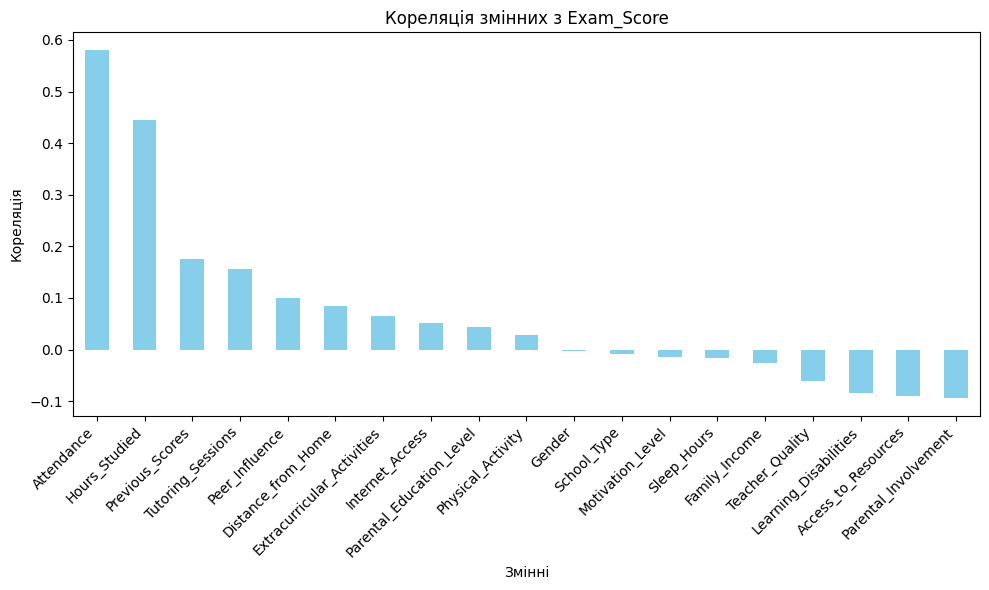

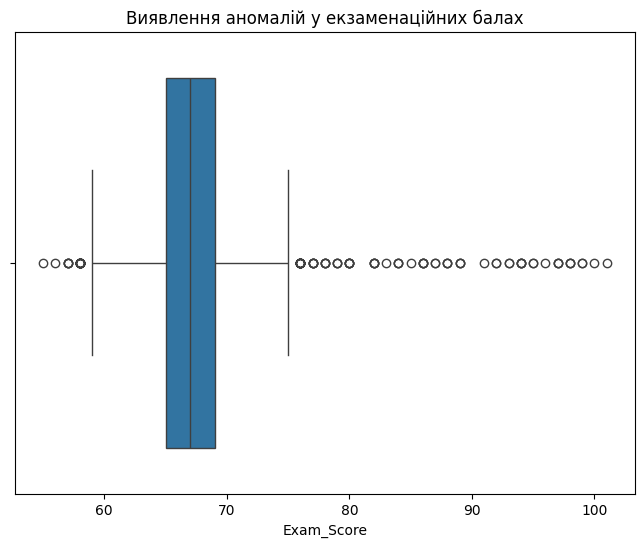

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Завантаження даних
data = pd.read_csv('StudentPerformanceFactors.csv')

# Перевірка пропущених значень
missing_data = data.isnull().sum()
print("Пропущені значення в кожному стовпці:")
print(missing_data)

# Заповнення пропущених значень
data['Teacher_Quality'].fillna('Unknown', inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)

# Перетворення категоріальних змінних на числові значення
label_encoder = LabelEncoder()

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                       'Distance_from_Home', 'Gender']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Описова статистика
print("\nОписова статистика:")
print(data.describe())

# Гістограма для кількості годин навчання
plt.figure(figsize=(8,6))
sns.histplot(data['Hours_Studied'], bins=15, kde=True)
plt.title('Гістограма кількості годин навчання')
plt.xlabel('Hours_Studied')
plt.ylabel('Кількість студентів')
plt.show()

# Boxplot для екзаменаційних балів
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Exam_Score'])
plt.title('Boxplot екзаменаційних балів')
plt.show()

# Кореляційна матриця
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

# Кореляція змінних з Exam_Score
exam_score_correlations = correlation_matrix['Exam_Score'].drop('Exam_Score')

# Побудова стовпчикової діаграми кореляції з Exam_Score
plt.figure(figsize=(10,6))
exam_score_correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Кореляція змінних з Exam_Score')
plt.xlabel('Змінні')
plt.ylabel('Кореляція')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Виявлення аномалій (викидів) за допомогою boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Exam_Score'])
plt.title('Виявлення аномалій у екзаменаційних балах')
plt.show()
